In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
#Donnée retrouvé sur kaggle
db=pd.read_csv('seattleWeather_1948-2017.csv')
db

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [5]:
db.duplicated().sum()

0

In [6]:
db.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [7]:
db=db.dropna()
db.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

### Recuperation des mois ainsi que les années et après chercher à connaitre le mois pluvieux

In [9]:
#Split
def mois(x):
    return x.split('-')[1]


def annee(y):
    return y.split('-')[0]

#Ajout des colonne

db['Mois']=db.DATE.apply(mois)
db['Annee']=db.DATE.apply(annee)
db

C:\Users\JOSUE\AppData\Local\Temp\ipykernel_2056\2297507273.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['Mois']=db.DATE.apply(mois)
C:\Users\JOSUE\AppData\Local\Temp\ipykernel_2056\2297507273.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['Annee']=db.DATE.apply(annee)


,DATE,PRCP,TMAX,TMIN,RAIN,Mois,Annee
0,1948-01-01,0.47,51,42,True,01,1948
1,1948-01-02,0.59,45,36,True,01,1948
2,1948-01-03,0.42,45,35,True,01,1948
3,1948-01-04,0.31,45,34,True,01,1948
4,1948-01-05,0.17,45,32,True,01,1948
...,...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False,12,2017
25547,2017-12-11,0.00,49,29,False,12,2017
25548,2017-12-12,0.00,46,32,False,12,2017
25549,2017-12-13,0.00,48,34,False,12,2017


In [10]:
#La probabilité de pluie dans chaque mois
precipitation_mois=pd.DataFrame(db.groupby("Mois")["RAIN"].mean().reset_index())
precipitation_mois

,Mois,RAIN
0,01,0.598157
1,02,0.557634
2,03,0.558525
3,04,0.475238
4,05,0.3553
5,06,0.301239
6,07,0.158065
7,08,0.190323
8,09,0.290138
9,10,0.437788


Text(0, 0.5, 'Précipitation')

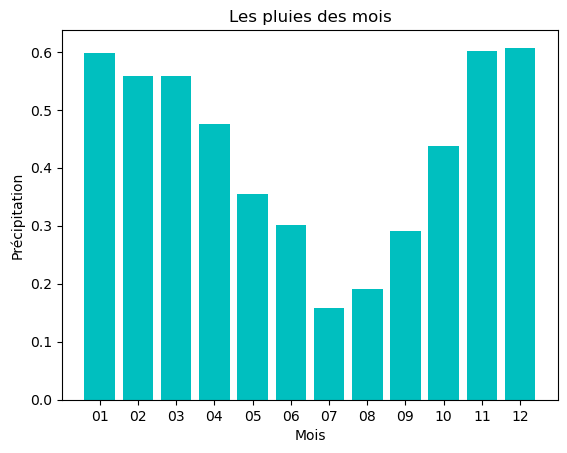

In [11]:
#Illustration en diagragramme
plt.bar(x=precipitation_mois.Mois,height=precipitation_mois.RAIN,color="c")
plt.title('Les pluies des mois')
plt.xlabel('Mois')
plt.ylabel('Précipitation')

In [12]:
#Le mois pluvieux
precipitation_mois[precipitation_mois.RAIN==precipitation_mois.RAIN.max()]

,Mois,RAIN
11,12,0.60706


In [13]:
#La quantité de pluie tombée pour chaque année
precipitation_annee=pd.DataFrame(db.groupby("Annee")["PRCP"].sum().reset_index())
precipitation_annee

,Annee,PRCP
0,1948,45.79
1,1949,32.46
2,1950,55.14
3,1951,40.30
4,1952,23.78
...,...,...
65,2013,32.56
66,2014,48.50
67,2015,44.83
68,2016,45.18


Text(0, 0.5, 'Taux de précipitation')

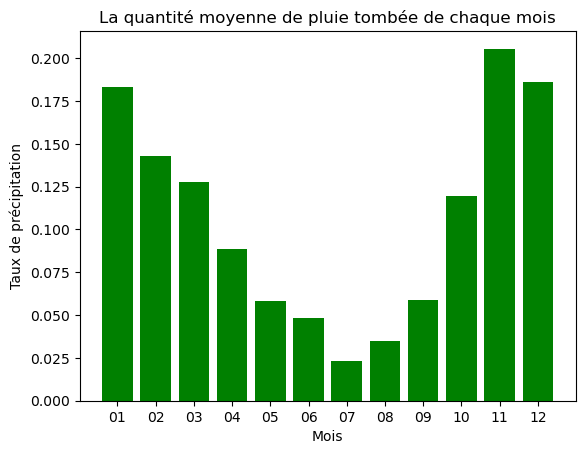

In [14]:

pre=pd.DataFrame(db.groupby('Mois')["PRCP"].mean().reset_index())
plt.bar(x=pre.Mois,height=pre.PRCP,color="g")
plt.title('La quantité moyenne de pluie tombée de chaque mois')
plt.xlabel('Mois')
plt.ylabel('Taux de précipitation')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69],
 [Text(0, 0, '1948'),
  Text(1, 0, '1949'),
  Text(2, 0, '1950'),
  Text(3, 0, '1951'),
  Text(4, 0, '1952'),
  Text(5, 0, '1953'),
  Text(6, 0, '1954'),
  Text(7, 0, '1955'),
  Text(8, 0, '1956'),
  Text(9, 0, '1957'),
  Text(10, 0, '1958'),
  Text(11, 0, '1959'),
  Text(12, 0, '1960'),
  Text(13, 0, '1961'),
  Text(14, 0, '1962'),
  Text(15, 0, '1963'),
  Text(16, 0, '1964'),
  Text(17, 0, '1965'),
  Text(18, 0, '1966'),
  Text(19, 0, '1967'),
  Text(20, 0, '1968'),
  Text(21, 0, '1969'),
  Text(22, 0, '1970'),
  Text(23, 0, '1971'),
  Text(24, 0, '1972'),
  Text(25, 0, '1973'),
 

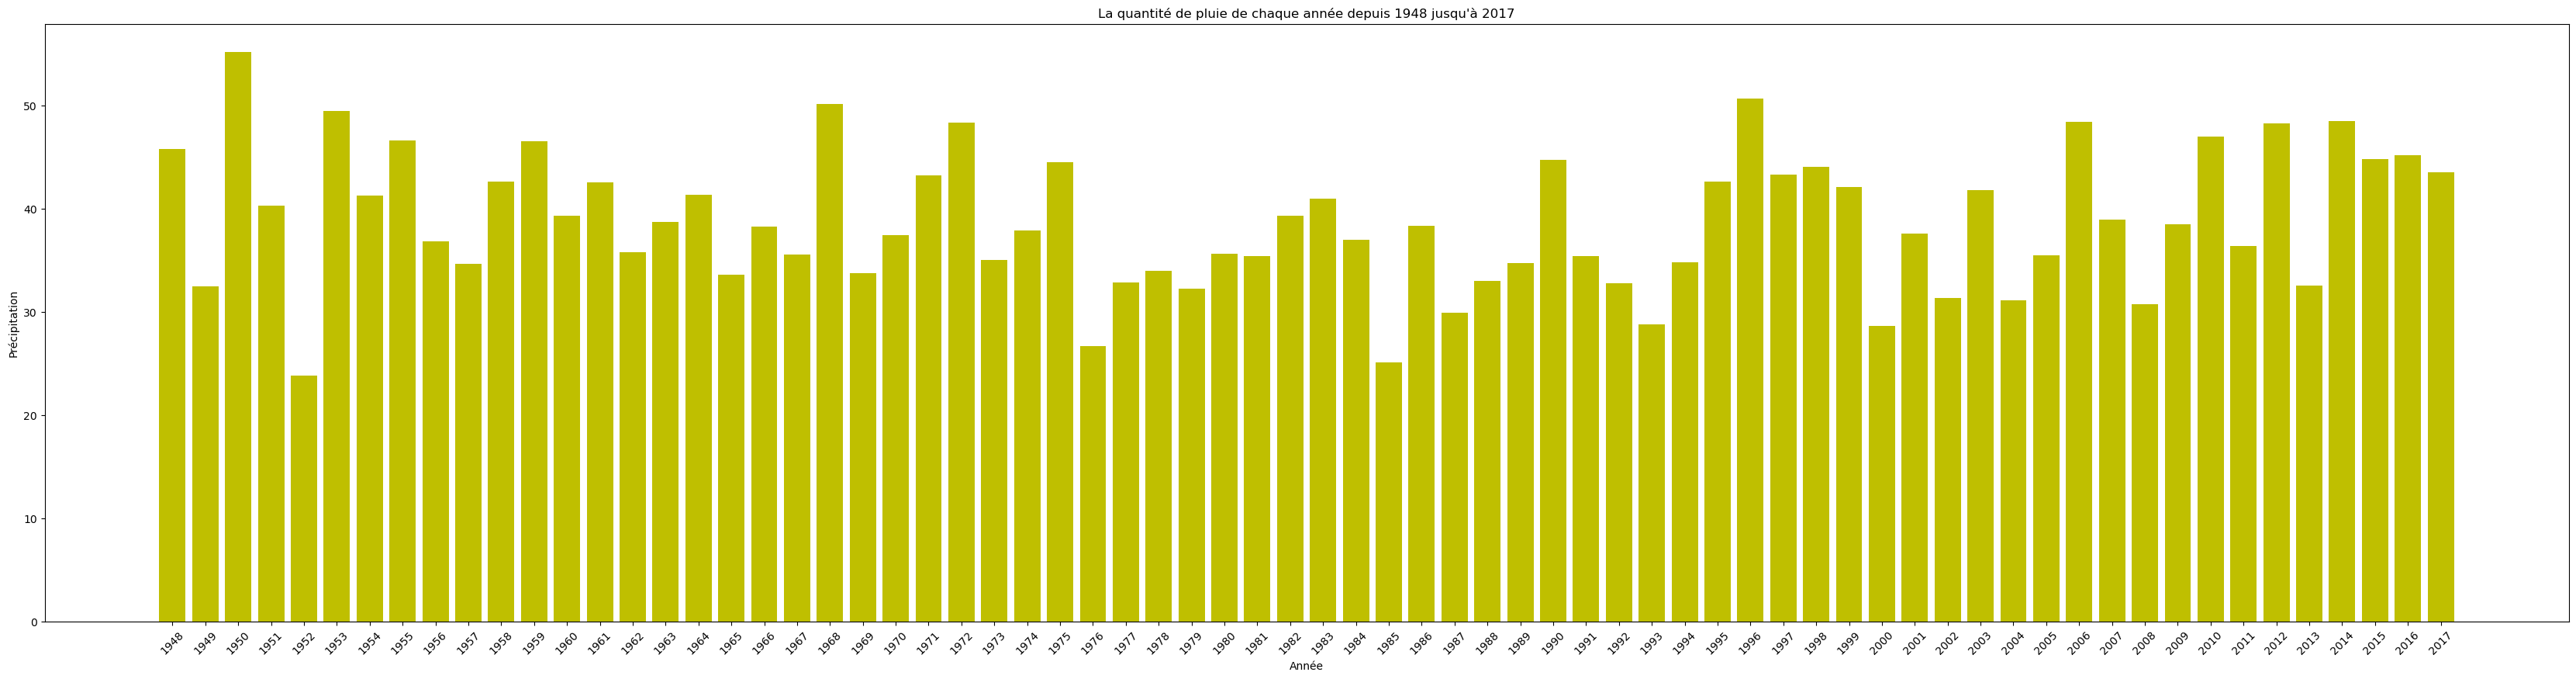

In [15]:
plt.figure(figsize=(42,10))
plt.bar(precipitation_annee.Annee,precipitation_annee.PRCP,color='y')
plt.title('La quantité de pluie de chaque année depuis 1948 jusqu\'à 2017')
plt.xlabel('Année')
plt.ylabel('Précipitation')
plt.xticks(rotation=45)


In [16]:
#Le mois avec une quantité de pluie elevé
precipitation_annee[precipitation_annee.PRCP==precipitation_annee.PRCP.max()]

,Annee,PRCP
2,1950,55.14


# Dans notre etude la saison des pluies commence habituelement en Octobre et se termine en Avril
### Pour les agriculteurs de cette zone ils peuvent commencer l'amenagement de leurs espaces de culture à partir de septembre et commencer les semence dès Octobre

In [19]:
db.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN', 'Mois', 'Annee'], dtype='object')

In [20]:
#Correlation entre les temperature le nombre de jour de pluie ainsi que la quantité de pluie
temp_pre=db[[ 'Mois','PRCP', 'TMAX', 'TMIN', 'RAIN']]
temp_pre.corr()

,Mois,PRCP,TMAX,TMIN,RAIN
Mois,1.000000,0.014918,0.154972,0.222504,-0.046046
PRCP,0.014918,1.000000,-0.226736,-0.064365,0.515160
TMAX,0.154972,-0.226736,1.000000,0.860675,-0.389241
TMIN,0.222504,-0.064365,0.860675,1.000000,-0.139905
RAIN,-0.046046,0.515160,-0.389241,-0.139905,1.000000


In [21]:
temp=temp_pre.groupby('Mois')[['PRCP', 'TMAX', 'TMIN', 'RAIN']].mean().reset_index()
temp

,Mois,PRCP,TMAX,TMIN,RAIN
0,01,0.183055,45.131797,35.208756,0.598157
1,02,0.143023,48.994944,36.787664,0.557634
2,03,0.127963,52.321659,38.393548,0.558525
3,04,0.088505,57.521905,41.460952,0.475238
4,05,0.058502,64.309217,46.733180,0.3553
5,06,0.048522,69.653956,51.628694,0.301239
6,07,0.023106,75.497696,55.005530,0.158065
7,08,0.034968,75.233180,55.317512,0.190323
8,09,0.059057,69.631729,51.754169,0.290138
9,10,0.119350,59.452535,45.667281,0.437788


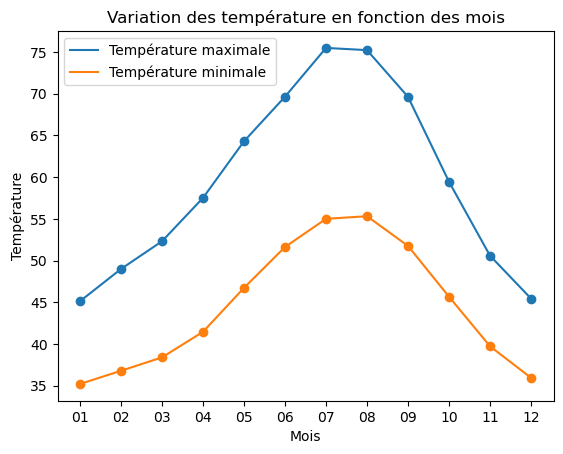

In [22]:
#Courbe montrant la variation des temperature en fonction du mois
plt.plot(temp.Mois,temp.TMAX,label='Température maximale')
plt.scatter(temp.Mois,temp.TMAX)
plt.plot(temp.Mois,temp.TMIN,label='Température minimale')
plt.scatter(temp.Mois,temp.TMIN)
plt.title('Variation des température en fonction des mois')
plt.xlabel('Mois')
plt.ylabel('Température')
plt.legend()

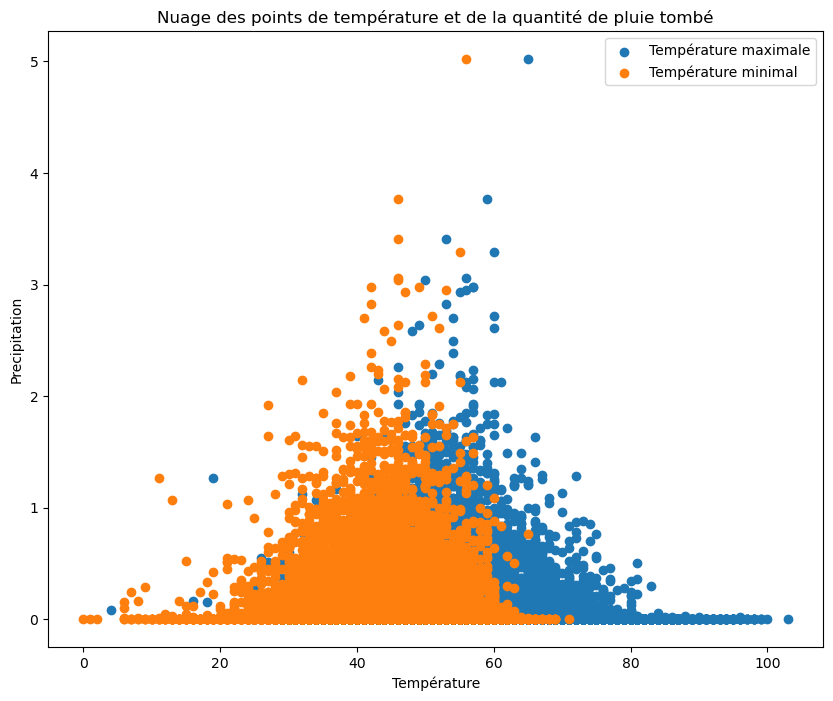

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(temp_pre.TMAX,temp_pre.PRCP,label='Température maximale')
plt.scatter(temp_pre.TMIN,temp_pre.PRCP,label='Température minimal')
plt.xlabel('Température')
plt.ylabel('Precipitation')
plt.legend()
plt.title('Nuage des points de température et de la quantité de pluie tombé')
plt.show()

In [24]:
temp_pre[temp_pre.PRCP==temp_pre.PRCP.max()]

,Mois,PRCP,TMAX,TMIN,RAIN
20381,10,5.02,65,56,True


In [25]:
temp_pre[temp_pre.TMAX==temp_pre.TMAX.max()]

,Mois,PRCP,TMAX,TMIN,RAIN
22490,07,0.0,103,71,False


In [26]:
temp_pre[temp_pre.TMAX<35].groupby('RAIN')['RAIN'].count()

RAIN
False    173
True      99
Name: RAIN, dtype: int64

### Les mois où il fais frais sont Janvier, Février, Mars, Novembre et Decembre 

In [28]:
temp_pre[(temp_pre.TMAX<55)&(temp_pre.TMAX<=70)].groupby('RAIN')['RAIN'].count()

RAIN
False    3957
True     6252
Name: RAIN, dtype: int64

In [29]:
temp_pre[temp_pre.TMAX>70].groupby('RAIN')['RAIN'].count()

RAIN
False    5121
True      385
Name: RAIN, dtype: int64

## De ces observations on peut déduire que lorsque la temperature maximale est inferieure à 30°F il y a 25% de chance qu'il pleut par contre lorque la temperature maximale est compris entre 55 et 70°F, la probabilité de pluie est de 60% et pour une température superieur à 70°F, la probabilité est de 7%

# Voyons voir si nous pouvons predire la pluie pour une journée en connaissance la température maximale et minimale si possible trouvé la quantité de pluie tombée

In [32]:
db

,DATE,PRCP,TMAX,TMIN,RAIN,Mois,Annee
0,1948-01-01,0.47,51,42,True,01,1948
1,1948-01-02,0.59,45,36,True,01,1948
2,1948-01-03,0.42,45,35,True,01,1948
3,1948-01-04,0.31,45,34,True,01,1948
4,1948-01-05,0.17,45,32,True,01,1948
...,...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False,12,2017
25547,2017-12-11,0.00,49,29,False,12,2017
25548,2017-12-12,0.00,46,32,False,12,2017
25549,2017-12-13,0.00,48,34,False,12,2017


In [33]:
dm=db.drop(['DATE','Mois','Annee'],axis=1)
dm

,PRCP,TMAX,TMIN,RAIN
0,0.47,51,42,True
1,0.59,45,36,True
2,0.42,45,35,True
3,0.31,45,34,True
4,0.17,45,32,True
...,...,...,...,...
25546,0.00,49,34,False
25547,0.00,49,29,False
25548,0.00,46,32,False
25549,0.00,48,34,False


In [34]:
y=dm[['RAIN']]
x=dm[['TMAX','TMIN']]

# Importation des bibliothèques necessaire pour une prediction

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print('Pour l\'entrainement des modèls importés les donnés  sont de taille : ',x_train.shape)
print('Et pour le test nous avons ',x_test.shape,' comme taille du donnée')

Pour l'entrainement des modèls importés les donnés  sont de taille :  (20438, 2)
Et pour le test nous avons  (5110, 2)  comme taille du donnée


In [38]:
models={'LogisticRegression' : LogisticRegression(random_state=100),
'KNeighborsClassifier' : KNeighborsClassifier(),
'DecisionTreeClassifier' :DecisionTreeClassifier(max_depth=10, random_state=100)
      }


In [39]:
# Definition d'une fonction de calcul de precision de chaque model

def precision(y_true,y_false,mod=False):
    precis=accuracy_score(y_true,y_false)
    if mod:
        return precis
    else:
        print('La précision du modèl est ',round(precis*100,2),'%')

In [40]:
#Définition d'une fonction qui prendra un à un les modèls

def model_test (models,x_train,y_train):
    for nom,model in models.items():
        model.fit(x_train,y_train)
        
def reponse(x_test,y_test):
    for nom,model in models.items():
        print(nom,':')
        precision(y_test,model.predict(x_test))
        print('_'*100)


model_test(models,x_train,y_train)
reponse(x_test,y_test)

C:\Users\JOSUE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
def prediction(x_test):
    for nom,model in models.items():
        predit=model.predict(x_test)
        print(nom,':')
        print(predit)